# Import packages

In [1]:
#Import packages
import numpy as np
import torch
import scipy.interpolate
import math
from scipy.integrate import quad
import Krylov
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
# import tikzplotlib as tikz

# Generate Hamiltonian matrix, initial wavefunction vector, as well as variables for time step, Krylov dimension size, grid size etc.

In [2]:
#Functions to generate variables
def absorbing(L,boundarywidth,a,x):
    b = [[0,0],[10,0],[12.480605508822585, -0.025158792783650075],
    [13.245010702282347, -0.03257908601267223],
    [14.009483537430615, -0.026268116475135272],
    [14.77405107094279, -0.000733379064415729],
    [15.538665953636922, 0.03441324228289511],
    [16.303328185513003, 0.07917174756679768],
    [17.067983653220235, 0.12255712657404416],
    [17.83243619586195, 0.12474871728161308],
    [18.596604643411943, 0.06926900436963357],
    [19.360502524207917, -0.0411357596085824],
    [20.12440040500389, -0.1515405235867986],
    [20.88860943756699, -0.19878147883884245],
    [21.653305490287323, -0.14715734217166054],
    [22.41842768564524, -0.009026250075155673],
    [23.183536352665456, 0.12635858946803724],
    [23.948266226230043, 0.1848483575184987],
    [24.71245496628659, 0.1334880234364868],
    [25.47625814871866, 0.0038594915850880263],
    [26.24013573700808, -0.11066465122309577],
    [27.292474204857513, -0.11267650830120823],
    [28.117179064690163, 0.028656934591100747],
    [28.88222009002188, 0.15031051136773455],
    [29.646794387702897, 0.17721837505511018],
    [30.410800495200483, 0.08878363150338853],
    [31.174508979268644, -0.06006866822119328],
    [31.938555671779326, -0.1402646541129795],
    [33.19031246675033, 0.03271543590141368],
    [33.955847276408136, 0.2546072308739291],
    [34.721212981844666, 0.442170868930047],
    [35.48590227039615, 0.49242187932057324],
    [36.24987455704949, 0.39712150438557203],
    [37.01345452190948, 0.22217980540452786],
    [37.77710212845798, 0.06096936919004303],
    [38.541094707617866, -0.030211626914990353],
    [39.30545931606453, -0.04587067780394838],
    [39.93095747062964, -0.03656994563448124],
    [40, -0.03656994563448124]]

    c = [[0,0],[0.3885984781742664, -0.010642886430429765],
    [1.1530374924782816, -0.011197548276172586],
    [1.9174832709511476, -0.01037908384525954],
[2.6819290494240136, -0.009560619414346272],
[3.4463748278968787, -0.008742154983433226],
[4.210820606369744, -0.00792369055252018],
[4.975266384842611, -0.007105226121607133],
[5.739712163315476, -0.006286761690693865],
[6.504157941788341, -0.005468297259780819],
[7.268603720261208, -0.004649832828867773],
[8.033049498734073, -0.0038313683979545043],
[8.797420871349582, -0.01811729301025644],
[9.561846357315895, -0.02141820740931122],
[10.326210965762556, -0.03707725829826902],
[11.090534989196115, -0.060975066847162473],
[11.854865776798519, -0.08349974911940006],
[12.619162743556675, -0.1128900627749172],
[13.383459710314828, -0.14228037643043412],
[14.14774314873528, -0.174416942639263],
[14.91198600214263, -0.2147922665080273],
[15.676222091381128, -0.2565407166534477],
[16.44045818061963, -0.2982891667988681],
[17.204660449013875, -0.346903248327568],
[17.96872066986226, -0.42435298166604163],
[18.732632078995938, -0.5320114930909461],
[19.496604365649265, -0.6273118680259473],
[20.261151606654888, -0.6058965094451954],
[21.026375264545567, -0.44716852319885225],
[21.7917139133067, -0.26509739024935786],
[22.55658583441715, -0.17777197038912207],
[23.32063252692783, -0.2579679562809081],
[24.014253699664152, -0.5271194958633858],
[24.638014536512284, -0.8704942602426384],
[25.332086653838637, -1.0481040480480557],
[25.923900696992913, -0.8229654520272898],
[26.342557654381203, -0.48015286523694645],
[26.93506615220413, -0.11403997147950617],
[27.699194014741025, -0.1777584420514211],
[28.46251017701585, -0.4062520658220463],
[29.158434925032935, -0.20777782341003692],
[29.853811775373117, -0.12052680940715654],
[30.37324075661575, -0.4821308209449864],
[30.684260960655607, -0.8284417231286718],
[31.238714469997795, -1.1337790107087646],
[31.796152330636836, -0.8332929850282662],
[32.1453985438932, -0.47343649651296893],
[32.70279176101783, -0.18201310425839945],
[33.22218523037399, -0.550826028748673],
[33.394261176485365, -0.8879713694037541],
[33.60098545017206, -1.2452186925211106],
[34.016420408464555, -1.556471922177869],
[34.57329639214441, -1.3700469192115894],
[34.78369135479399, -0.9821443828636678],
[34.98251620662475, -0.5917368493181039],
[35.530117560889295, -0.29855296938403897],
[35.9208112708093, -0.5680757866789787],
[36.06264371610081, -0.9314343108804866],
[36.20677158209174, -1.2990699317823267],
[36.35102593804018, -1.6410280913107016],
[36.78630020357126, -2.000380273459477],
[37.01286603921948, -2.248519674082126],
[37.30981981592624, -1.6883353354174808],
[37.492659809401744, -1.251121557204666],
[37.789998016371506, -0.8480216244918353],
[38.16608773708018, -0.5811357862129443],
[38.22731844297986, -0.24338102615475843],
[38.423764787570484, -1.2763054597243388],
[38.49798215008759, -1.728348325308152],
[38.572308641195484, -2.1582380869619167],
[38.639839397331556, -2.5569195518454393],
[38.70732550995321, -2.9646636501548906],
[38.77484138491781, -3.366365992847056],
[38.842297735196524, -3.7801518467737942],
[38.890795473020994, -4.280556039443592],
[38.93521576986237, -4.668185754314543],
[38.94723975641106, -5.048801477032091],
[39.00091614190748, -5.438435189661156],
[39.01288060377029, -5.831134423613277],
[39.085675042843874, -6.370496105940115],
[39.13313535042863, -6.812785780879016],
[39.14502540643408, -7.220589403874353],
[39.19891012833111, -7.5679308271824155],
[39.21081506550803, -7.972713572369107],
[39.26473451013848, -8.313006280790338],
[39.276649368096386, -8.715775107437937],
[39.33055889194586, -9.058081734398257],
[39.34242414599886, -9.470920153741334],
[39.39638327375324, -9.803157188006182],
[39.408243567415745, -10.217002566618802],
[39.4445238634624, -10.611186197425171],
[39.529435827876775, -11.008338621940032],
[39.61983646436875, -11.46690936140919],
[39.698694272189606, -11.917436827698193],
[39.74534674475166, -12.322182369956208],
[39.84527381118041, -12.727877826993131],
[39.88052730639557, -13.095378277254108],
[39.969010751963005, -13.472891275719922],
[40.03679448801409, -13.820217817856513]]

    b=np.array(b)
    c=np.array(c)
    aI=scipy.interpolate.interp1d(c.T[0],c.T[1])
    aR=scipy.interpolate.interp1d(b.T[0],b.T[1])
    
    def ab(x):
        return aR(x)+1j*aI(x)
    
    def rescale(x):
        return 40*x/boundarywidth

    activeregion=L-boundarywidth

    def reparam(x):
        z=np.zeros((len(x),1))
        for i in range (len(x)):
            if (np.absolute(x[i])<activeregion):
                z[i]=0
            else:
                z[i]=np.absolute(x[i])-activeregion
        return z
    
    def Vabsorbing(x):
        return ab(reparam(rescale(x)))
    
    def Omega(a,b,alpha,x):
        return np.subtract(np.tanh(alpha*np.subtract(x,a)),np.tanh(alpha*np.subtract(x,b)))/2
    
    def OmegaActual(x):
        return Omega(-a,a,1,x)

    def dOmega(a,b,alpha,x):
        return np.multiply(np.subtract(np.divide(np.divide(1,np.cosh(np.multiply(alpha,np.subtract(x,a)))),np.cosh(np.multiply(alpha,np.subtract(x,a)))),np.divide(np.divide(1,np.cosh(np.multiply(alpha,np.subtract(x,b)))),np.cosh(np.multiply(alpha,np.subtract(x,b))))),alpha/2)

    def dOmegaActual(x):
        return dOmega(-a,a,1,x)

    def arrayfun(x):
        IntVec=np.zeros((len(x),),dtype='complex_')
        integrand=lambda y: np.multiply(Potential(y),dOmegaActual(y))
        for i in range (1,len(x)+1):
            IntVec[i-1],error=quad(integrand,0,x[i-1])
        return IntVec#trapz(np.multiply(Potential(x),dOmegaActual),x)

    def Potential(x):
        softening = 1
        return np.subtract(1,np.divide(1,np.sqrt(np.add(np.multiply(x,x),softening))))

    V0mod=np.subtract(np.multiply(Potential(x),OmegaActual(x)),arrayfun(x))
    xmod=np.multiply(x,OmegaActual(x))-(np.log(np.cosh(np.subtract(a,x)))-np.log(np.cosh(np.add(a,x)))+np.multiply(np.multiply(x,np.divide(1,np.cosh(a))),np.multiply(np.divide(1,np.cosh(np.add(a,x))),np.sinh(x)))+np.multiply(x,np.tanh(a))+np.multiply(x,np.tanh(np.subtract(a,x))))/2
    Vabs=Vabsorbing(x)
    return V0mod, xmod, Vabs

def Setup(dt,N):
    # Boxsize=500
    Boxsize = N
    L=240
    dx=2*L/(N-1)
    x=np.linspace(-L,L,Boxsize)
    xq=np.linspace(-L,L,N)
    #print("Loading Coulomb Potential with absorbing boundaries")
    Vmod,xmod,Vabs=absorbing(L,L/6,197.5,x)
    Vabs.shape=(Boxsize,)
    V0=np.add(Vmod,Vabs)
    magnitude=10**-3
    Ve=V0+np.multiply(magnitude,xmod)
    V0interp=scipy.interpolate.interp1d(x,V0)
    Veinterp=scipy.interpolate.interp1d(x,Ve)
    V0q=V0interp(xq)
    Veq=Veinterp(xq)
    H0=np.zeros((N,N),dtype = 'complex_')
    He=np.zeros((N,N),dtype = 'complex_')
    for i in range (1,N):
        H0[i][i]=2*(dx**-2)+V0q[i]
        H0[i][i-1]=-1*(dx**-2)
        H0[i-1][i]=-1*(dx**-2)
        He[i][i]=2*(dx**-2)+Veq[i]
        He[i][i-1]=-1*(dx**-2)
        He[i-1][i]=-1*(dx**-2)
    H0[0,0]=2*(dx**-2)+V0q[0]
    He[0,0]=2*(dx**-2)+Veq[0]
    k=5
    t0=200
    #print("Diagonalising H0 by brite force")
    e,U=np.linalg.eig(H0)
    e=e.real
    #e=np.diag(e)[0]
    esort=sorted(e)

    #print("Finding the ",k,"th eigenfunction of H0")
    e=e.tolist()
    i=e.index(esort[k])
    psi=U[:,i]
    #print("Propogating the inital condition by He using expm")
    u0=np.matmul(scipy.linalg.expm(np.multiply(-1j*t0,He)),psi)
    #Periodic boundaries
    u0[0]=u0[-2]
    u0[-1]=u0[1]
    return H0,u0,dt,dx,xq,V0q

def init(dt,N):
    H0,u0,dt,dx,x,V = Setup(dt,N)
    A = torch.tensor(-1j*H0,dtype = torch.complex128)
    dist = torch.distributions.normal.Normal(torch.zeros((N,)),torch.ones((N,)))
    rndr = dist.sample()
    rndi = dist.sample()
    rnd = rndr + 1j*rndi
    v = torch.tensor(u0,dtype = torch.complex128)
    v += v*rnd*0#1e-5
    V = torch.from_numpy(V)
    return A,v,dt,dx,x,V

In [42]:
#Initialise variables.
dt = 10 # time step
N = 1001 # spatial dimension size
n = 100 # number of time steps
t = torch.linspace(0,n*dt,n+1) # time
m = 25 # Krylov subspace dimension
A,v,dt,dx,x,V0 = init(dt,N) # Schrodinger equation variables


(-1.0, 1.0)

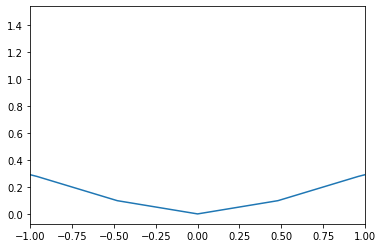

In [17]:
plt.plot(x,V0.real)
plt.xlim([-1,1])
# plt.ylim([])

In [4]:
#Save variables
torch.save(A,"Schrodinger_data/A.pt")
torch.save(v,"Schrodinger_data/v.pt")
torch.save(dt,"Schrodinger_data/dt.pt")
torch.save(dx,"Schrodinger_data/dx.pt")
torch.save(x,"Schrodinger_data/x.pt")
torch.save(V0,"Schrodinger_data/V0.pt")
torch.save(n,"Schrodinger_data/n.pt")
torch.save(t,"Schrodinger_data/t.pt")
torch.save(m,"Schrodinger_data/m.pt")

# Load Variables

In [2]:
#Load variables
A = torch.load("Schrodinger_data/A.pt")
v = torch.load("Schrodinger_data/v.pt")
N = len(v)
dt = torch.load("Schrodinger_data/dt.pt")
dx = torch.load("Schrodinger_data/dx.pt")
x = torch.load("Schrodinger_data/x.pt")
V0 = torch.load("Schrodinger_data/V0.pt")
n = torch.load("Schrodinger_data/n.pt")
t = torch.load("Schrodinger_data/t.pt")
m = torch.load("Schrodinger_data/m.pt")

C:\Users\Mark\AppData\Local\Temp\ipykernel_6320\3184572331.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  A = torch.load("Schrodinger_data/A.pt")
C:\Users\Mark\AppData\

In [5]:
#time-dependent pulse
# def e(tau):
#     a = 1/425
#     sigma = t[-1]/5
#     alpha = t[-1]/2
#     omega = 5e-2*(1000/t[-1])
#     return a*np.exp(-((tau-alpha)**4)/(2*sigma**4))*np.sin(omega*tau)
import bisect
def e(tau):
    # a = 1/425
    a = 1/100
    # stepsa = np.array([0,0,1,2,1,0,-1,-2,-1,0])*a/2
    # # stepst = torch.tensor((torch.arange(1,11)*n/10),dtype = torch.int)*dt
    # stepst = np.array(np.arange(1,10)*n/10,dtype=np.int32)*dt
    # i = bisect.bisect_right(stepst,tau) 
    # return stepsa[i]
    if tau > 250 and tau < 750:
        if tau%100 >= 80:
            return a
        elif tau%100 < 20:
            return -a
        else:
            return 0
    else:
        return 0
#magnus expansion
def magnus(t,N,dt,dx):
    roots = torch.tensor([-0.77459667,  0.        ,  0.77459667])
    weights = torch.tensor([0.55555556, 0.88888889, 0.55555556])
    # roots,weights = scipy.special.roots_legendre(31)
    # roots = torch.tensor(roots)
    # weights = torch.tensor(weights)
    Nabla = (torch.diag(torch.ones(N-1,),-1)+torch.diag(torch.ones(N-1,),1)+torch.diag(-2*torch.ones(N,),0))/(dx**2)
    Delta = (torch.diag(torch.ones(N-1,),1) + torch.diag(-torch.ones(N-1,),-1))/(2*dx)
    def Vtilde(V0,t,dt):
        return torch.diag(Krylov.Optimise.interpv(V0,N,[-240,240])) + torch.diag(r(t,dt)*torch.linspace(-240,240,N))

    def r(t,dt):
        return torch.tensor(dt* e(dt/2 * roots + t+dt/2).dot(weights)/(2*dt))

    def sfunc(zeta):
        return (zeta-dt/2)*e(t+zeta)

    def s(t,dt):
        a = 0
        b = dt
        return torch.tensor(dt*sfunc(dt/2 * roots + dt/2).dot(weights))
    
    # out = 1j*dt*Nabla - 1j*dt*Vtilde(V0,t,dt) - s(t,dt)*Delta
    out = -1j*dt*(-Nabla + torch.diag(Krylov.Optimise.interpv(V0,N,[-240,240])) +e(t)*torch.diag(torch.tensor(torch.linspace(-240,240,N))))
    return out


# def magnus(t,N,dt,dx):
    
#     Nabla = (torch.diag(torch.ones(N-1,),-1)+torch.diag(torch.ones(N-1,),1)+torch.diag(-2*torch.ones(N,),0))/(dx**2)
#     Delta = (torch.diag(torch.ones(N-1,),1) + torch.diag(-torch.ones(N-1,),-1))/(2*dx)
#     def Vtilde(V0,t,dt):
#         return torch.diag(Krylov.Optimise.interpv(V0,N,[-240,240])) + torch.diag(r(t,dt)*torch.linspace(-240,240,N))

#     def r(t,dt):
#         return torch.tensor(quad(e,t,t+dt)[0])/dt

#     def sfunc(zeta):
#         return (zeta-dt/2)*e(t+zeta)

#     def s(t,dt):
#         return torch.tensor(2*quad(sfunc,0,dt)[0])
    
#     out = 1j*dt*Nabla - 1j*dt*Vtilde(V0,t,dt) - s(t,dt)*Delta
#     return out

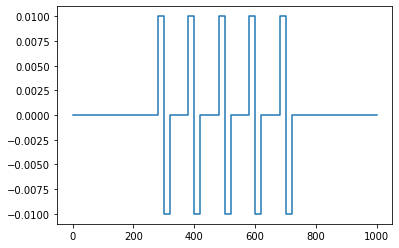

In [8]:
d = 1e-8
tau = [0,80-d,80+d,100-d,100+d,120-d,120+d,180-d,180+d,200-d,200+d,220-d,220+d,280-d,280+d,300-d,300+d,320-d,320+d,380-d,380+d,400-d,400+d,420-d,420+d,480-d,480+d,500-d,500+d,520-d,520+d,580-d,580+d,600-d,600+d,620-d,620+d,680-d,680+d,700-d,700+d,720-d,720+d,780-d,780+d,800-d,800+d,820-d,820+d,880-d,880+d,900-d,900+d,920-d,920+d,1000]
plotpulse(tau)


# Compute reference solution by brute force

In [24]:
#Compute reference solution by brute force
import time as clock
def Reference(t,N,dt,dx,v):
    # dtratio = 1
    # time = torch.linspace(t[0],t[-1],dtratio*(len(t)-1)+1)
    time = t
    out = torch.zeros((len(v),len(time)),dtype = torch.complex128)
    out[:,0] = v
    t0 = clock.time()
    for i in range (len(time)-1):
        M = magnus(time[i],N,time[1]-time[0],dx)
        out[:,i+1] = torch.matrix_exp(M) @ out[:,i]
        t1 = clock.time()
        eta = (t1-t0)*(time[-1] - time[i+1])/time[i+1]
        print('t = {0:^4.2f} - eta {1:>d}:{2:>02d}:{3:>02d}'.format(time[i+1],math.floor(eta/(60**2)),math.floor((eta%(60**2))/60),math.floor(eta%60)),end='\r')
    return out
glo_ref = Reference(t,len(v),dt,dx,v)
torch.save(glo_ref,"Schrodinger_data/Ref_Sol.pt")

C:\Users\mt767\AppData\Local\Temp\ipykernel_8060\3606451224.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out = -1j*dt*(-Nabla + torch.diag(Krylov.Optimise.interpv(V0,N,[-240,240])) +e(t)*torch.diag(torch.tensor(torch.linspace(-240,240,N))))


In [9]:
reftime = torch.linspace(t[0],t[1],n*10)
glo_ref = Reference(reftime,len(v),dx,v)
torch.save(glo_ref,"Schrodinger_data/Ref_Sol.pt")

In [4]:
#Load reference solution
glo_ref = torch.load("Schrodinger_data/Ref_Sol.pt")

C:\Users\Mark\AppData\Local\Temp\ipykernel_6320\3840266604.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  glo_ref = torch.load("Schrodinger_data/Ref_Sol.pt")


# Compute and produce contour plot of the loss plotted against shift

In [22]:
import time as clock
#Parameter sweep over a given range
def Sweep(gammaR,gammaI,H,v,dt,dx,m,loss_fn):
    loss = torch.zeros((len(gammaI),len(gammaR)))
    # Ref = Krylov.Solution.Exact(H,v,dt,torch.matrix_exp)
    t0 = clock.time()
    for i in range (len(gammaI)):
        for j in range (len(gammaR)):
            # print('[{0:^3d},{1:^3d}]'.format(i,j),end='\r')
            # gamma = gammaR[j] + 1j*gammaI[i]
            # Vm,Hm,beta = Krylov.Arnoldi.Polynomial(H,v,m,gamma,dx,"Shift Invert")
            if loss_fn == "defect_SI":
                loss[i,j] = Krylov.Optimise.loss(H,v,dt,dx,m,[gammaR[j],gammaI[i]],"defect")
                # Vm,Hm,beta = Krylov.Arnoldi.Polynomial(H,v,m,gamma,dx,"Shift Invert")
                # Vm = Vm[:,0:-1]
                # Hm = Hm[0:-1,0:-1]
                # Am = gamma*torch.eye(len(Hm)) - torch.linalg.inv(Hm)
                # loss[i,j] = Krylov.Solution.defect(H,Vm,Am,beta,dt,dx,m)
            elif loss_fn == "defect_RQ":
                shift = gammaR[j] + 1j*gammaI[i]
                X = torch.linalg.inv(H - shift*torch.eye(len(v)))
                Vm,Hm,beta = Krylov.Arnoldi.Polynomial(X,v,m,dx)
                #Rayleigh Quotient
                loss[i,j] = Krylov.Solution.RQ_defect(A,Vm,Hm,beta,shift,dt,dx)
                #Shift Invert
                # out = Krylov.Solution.SI_defect(A,Vm,Hm,beta,shift,dt,dx)
            elif loss_fn == "l2":
                # gamma = gammaR[j] + 1j*gammaI[i]
                # Vm,Hm,beta = Krylov.Arnoldi.Polynomial(H,v,m,gamma,dx,"Shift Invert")
                # REst = Krylov.Solution.Shift_Invert(Vm,Hm,dt,beta,gamma,torch.matrix_exp)
                # # REst = Krylov.Solution.Rayleigh(Vm,H,dt,dx,beta,torch.matrix_exp)
                # loss[i,j] = Krylov.L2.Error(REst,Ref,dx)
                loss[i,j] = Krylov.Optimise.loss(H,v,dt,dx,m,[gammaR[j],gammaI[i]],"l2")
            
            t1 = clock.time()
            eta = (t1-t0)*(len(gammaR)*len(gammaI)-i*len(gammaI)+j)/(i*len(gammaI)+j+1)
            print('shift = {0:^2.2f} - eta {1:>02d}:{2:>02d}:{3:>02d}'.format(gammaR[i]+1j*gammaI[j],math.floor(eta/(60**2)),math.floor((eta%(60**2))/60),math.floor(eta%60)),end='\r')
    return loss



In [30]:
#Contour plot
import tikzplotlib as tikz
def Contour(gammaR,gammaI,loss,shifts = [0],randshifts = [0],optshift = [0],Filename = "Contour.tex"):
    hold = torch.nan_to_num(loss,nan=1e0)
    # if torch.log10(torch.max(hold)) < -2:
    levels = torch.logspace(torch.log10(torch.max(torch.tensor([torch.min(hold),1e-15]))),min(-2,torch.log10(torch.max(hold))),15)
    # else:
    #     levels = torch.logspace(torch.floor(torch.log10(torch.min(hold))),torch.ceil(torch.log10(torch.max(hold))),int(1+torch.ceil(torch.log10(torch.max(hold)))-torch.floor(torch.log10(torch.min(hold)))))
    cont = plt.contour(gammaR,gammaI,loss,levels,norm=LogNorm())
    fmt = '%1.1e'  # Exponential format
    plt.clabel(cont, inline=True, fontsize=8, fmt=fmt, colors='black', manual=False, inline_spacing=3)
    # plt.title("Rayleigh")
    if optshift != [0]:
        marker = ['o','s']
        for i in range(len(optshift)):
            plt.plot(optshift[i].real,optshift[i].imag,marker = marker[i],color = 'k')
    if randshifts != [0]:
        plt.plot(randshifts.real,randshifts.imag,'^',color = [0,0.2,0.8])
    if shifts != [0]:
        col = [1,0.1,0.2]#],[0,0.6,0.1]
        for i in range(len(shifts)):
            plt.plot(shifts[i].real,shifts[i].imag,'x',color = 'r')
            # for j in range (len(shifts[i])+1):
        for i in range(len(shifts)-1):
            plt.arrow(shifts[i].real,shifts[i].imag,shifts[i+1].real - shifts[i].real,shifts[i+1].imag - shifts[i].imag,linestyle = (3,(3,6)),color = 'k',head_length = 0)
    tikz.save("Schrodinger_data/"+Filename)

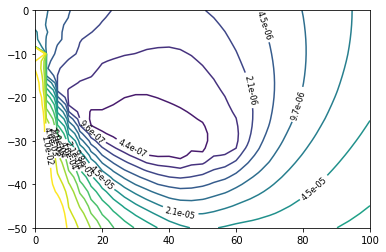

In [33]:
gammaN = 31
gammaR = torch.linspace(0,100,gammaN)
gammaI = torch.linspace(-50,0,gammaN)

N0 = 1001
A,u0,dt,dx0,x0,V0 = init(dt,N0) # Schrodinger equation variables
# dx0 = dx*(N-1)/(N0-1)
# M = magnus(t[0],N0,dt,dx0)
v0 = Krylov.Optimise.interpv(v,N0,[-240,240])
loss = Sweep(gammaR,gammaI,dt*A,v0,1,dx0,m,"defect_SI")
Contour(gammaR,gammaI,loss,Filename = "Contour_N="+str(N0)+".tex")

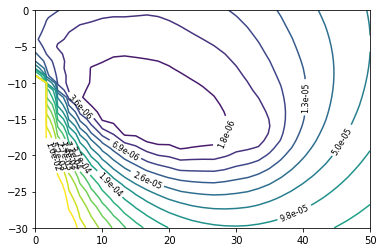

In [66]:
loss = Sweep(gammaR,gammaI,M,u,1,dx,m,"defect_RQ")
Contour(gammaR,gammaI,loss)

In [69]:
n_index = [0,15,25,35,45,55,65,75,85,95]
gammaR = torch.linspace(0,50,51)
gammaI = torch.linspace(-30,0,51)
for i in n_index:
    M = magnus(t[i],N,dt,dx)
    u = glo_ref[:,i]

    filename = "Schrodinger_data/Contour_RQ_n="+str(i)
    loss = Sweep(gammaR,gammaI,M,u,1,dx,m-1,"defect_RQ")
    torch.save(loss,filename+".pt")
    Contour(gammaR,gammaI,loss,Filename = filename+".tex")
    plt.clf()
    
    filename = "Schrodinger_data/Contour_SI_n="+str(i)
    loss = Sweep(gammaR,gammaI,M,u,1,dx,m-1,"defect_SI")
    torch.save(loss,filename+".pt")
    Contour(gammaR,gammaI,loss,Filename = filename+".tex")
    plt.clf()



C:\Users\mt767\AppData\Local\Temp\ipykernel_12728\270929892.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out = -1j*dt*(-Nabla + torch.diag(Krylov.Optimise.interpv(V0,N,[-240,240])) +e(t)*torch.diag(torch.tensor(torch.linspace(-240,240,N))))


<Figure size 432x288 with 0 Axes>

C:\Users\mt767\AppData\Local\Temp\ipykernel_13516\1061813426.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(dt* e(dt/2 * roots + t+dt/2).dot(weights)/(2*dt))
C:\Users\mt767\AppData\Local\Temp\ipykernel_13516\1061813426.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(dt*sfunc(dt/2 * roots + dt/2).dot(weights))


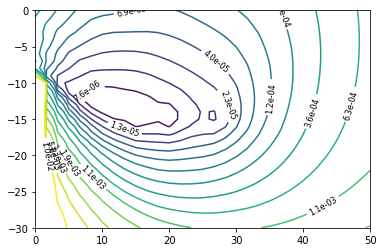

In [10]:
gammaR = torch.linspace(0,50,31)
gammaI = torch.linspace(-30,0,31)

M = magnus(t[0],len(v),dt,dx)

loss_fn = "defect"
# loss_fn = "l2"

loss = Sweep(gammaR,gammaI,M,v,1,dx,m,"defect")
torch.save(loss,"Schrodinger_data/def_contour.pt")
Contour(gammaR,gammaI,loss)

# Run shift and invert Krylov time integration

In [41]:
#Functions for time-dependent potential and laplacian
def D2(dx,N):
    K2 = torch.tensor((torch.diag(torch.ones(N-1,),-1)+torch.diag(-2*torch.ones(N,))+torch.diag(torch.ones(N-1,),1))*(dx**-2),dtype=torch.complex128)
    return K2

def V(t):
    return torch.diag(V0 + e(t)*x)


In [55]:
#Coarse Grid Optimisation
def Time_Int(v,m,dx,dt,t,coarse_N,ftol,glo_ref):
    # true_shifts = torch.load("Linear/Fine_Grid/time_integration/Optimiser_Shifts.pt")
    # print('t = {0:^4.2f}'.format(t[0]),end='\n')
    coarse_dx = dx*(len(v)-1)/(coarse_N-1)
    # coarse_Magnus = magnus(t[0],coarse_N,dt,coarse_dx)
    A,u0,dt,dx0,x0,pot0 = init(dt,coarse_N)
    coarse_Magnus = dt*(A-1j*torch.diag(e(t[0])*torch.tensor(x0)))
    coarse_v = Krylov.Optimise.interpv(v,coarse_N,[-240,240])
    M = magnus(t[0],len(v),dt,dx)
    options = {'iprint':0,
           'maxiter':100,
           'disp': True,
           'gtol':1e-15,
           'ftol':1e-15}
    bounds = [(0,100),(-100,0)]

    Pot_energy = torch.tensor([Krylov.L2.IP(v,V(t[0]) @ v,dx).real])
    Kin_energy = torch.tensor([Krylov.L2.IP(v,-D2(dx,len(v))@v,dx).real])
    Tot_energy = torch.tensor([Pot_energy + Kin_energy])
    Num_sols = torch.reshape(v,[len(v),1])
    
    true_shifts,true_loss,rawshifts,obj_loss,randgammas = Krylov.Optimise.Optimise(A =coarse_Magnus,
                                                                    v = coarse_v,
                                                                    dx = coarse_dx,
                                                                    m = m,
                                                                    true_dt=1,
                                                                    coarse_dt=1,
                                                                    coarse_N=coarse_N,
                                                                    options=options,
                                                                    tol = ftol,
                                                                    print_output=True,
                                                                    return_loss=False,
                                                                    rand_n=3,
                                                                    # x0 = [4.7673,-25.9358],
                                                                    # x0 = [18.477340,-15.298254],
                                                                    rand_bounds=[[0,50],[-30,0]],
                                                                    bounds = bounds,
                                                                    loss_fn = "l2")
    torch.save(randgammas,"Schrodinger_data/randshifts.pt")
    torch.save(true_shifts,"Schrodinger_data/optpath.pt")
    torch.save(obj_loss,"Schrodinger_data/objloss.pt")
    for i in range (len(true_shifts)):
        true_loss[i] = Krylov.Optimise.loss(M,v,1,dx,m,[true_shifts[i].real,true_shifts[i].imag],"l2")
    torch.save(true_loss,"Schrodinger_data/trueloss.pt")
    X = torch.linalg.inv(M - true_shifts[-1]*torch.eye(len(v)))
    Vm,Hm,beta = Krylov.Arnoldi.Polynomial(X,v,m,dx)
    Am = Krylov.Solution.Rayleigh_Quotient(M,Vm,Hm,true_shifts[-1],dx)
    # Am = true_shifts[-1]*torch.eye(m) + torch.linalg.inv(Hm[0:-1,0:-1])
    Est = Krylov.Solution.Polynomial(Vm[:,0:-1],Am,1,beta,torch.matrix_exp)
    Ref = torch.matrix_exp(M) @ v
    objective = torch.tensor([obj_loss[-1]])
    opt_shifts_t = torch.tensor([true_shifts[-1]])
    N_iter = torch.tensor([len(true_shifts)-1])
    Glo_error = torch.tensor([Krylov.L2.Error(Est,glo_ref[:,1],dx)])
    Loc_error = torch.tensor([Krylov.L2.Error(Est,Ref,dx)])
    # print(Loc_error)
    Pot_energy = torch.cat((Pot_energy,torch.tensor([Krylov.L2.IP(Est,V(0) @ Est,dx).real])))
    Kin_energy = torch.cat((Kin_energy,torch.tensor([Krylov.L2.IP(Est,-D2(dx,len(v))@Est,dx).real])))
    Tot_energy = torch.cat((Tot_energy,torch.tensor([Pot_energy[-1] + Kin_energy[-1]])))
    Num_sols = torch.cat((Num_sols,torch.reshape(Est,[len(Est),1])),dim=1)

    for i in range (1,len(t)-1):
        # print('t = {0:^4.2f}'.format(t[i]),end='\n')
        M = magnus(t[i],len(v),dt,dx)
        # coarse_Magnus = magnus(t[i],coarse_N,dt,coarse_dx)
        coarse_Magnus = dt*(A-1j*torch.diag(e(t[i])*torch.tensor(x0)))
        coarse_v = Krylov.Optimise.interpv(Est,coarse_N,[-240,240])
        true_shifts,true_loss,rawshifts,obj_loss,randgammas = Krylov.Optimise.Optimise(A = coarse_Magnus,
                                                                    v = coarse_v,
                                                                    dx = coarse_dx,
                                                                    m = m,
                                                                    true_dt=1,
                                                                    coarse_dt=1,
                                                                    coarse_N=coarse_N,
                                                                    options=options,
                                                                    tol = ftol,
                                                                    print_output=True,
                                                                    return_loss=False,
                                                                    x0 = [true_shifts[-1].real,true_shifts[-1].imag],
                                                                    bounds= bounds,
                                                                    loss_fn = "l2")
        
    
        objective = torch.cat((objective,torch.tensor([obj_loss[-1]])))
        opt_shifts_t = torch.cat((opt_shifts_t,torch.tensor([true_shifts[-1]])))
        N_iter = torch.cat((N_iter,torch.tensor([len(true_shifts)-1])))
        Ref = torch.matrix_exp(M) @ Est
        X = torch.linalg.inv(M - true_shifts[-1]*torch.eye(len(v)))
        Vm,Hm,beta = Krylov.Arnoldi.Polynomial(X,Est,m,dx)
        Am = Krylov.Solution.Rayleigh_Quotient(M,Vm,Hm,true_shifts[-1],dx)
        # Am = true_shifts[-1]*torch.eye(m) + torch.linalg.inv(Hm[0:-1,0:-1])
        Est = Krylov.Solution.Polynomial(Vm[:,0:-1],Am,1,beta,torch.matrix_exp)
        # Est = Krylov.Solution.Shift_Invert(Vm,Hm,1,beta,true_shifts[-1],torch.matrix_exp)
        # Est = Krylov.Solution.Rayleigh(Vm,A,dt,dx,beta,torch.matrix_exp)
        Pot_energy = torch.cat((Pot_energy,torch.tensor([Krylov.L2.IP(Est,V(0) @ Est,dx).real])))
        Kin_energy = torch.cat((Kin_energy,torch.tensor([Krylov.L2.IP(Est,-D2(dx,len(v))@Est,dx).real])))
        Tot_energy = torch.cat((Tot_energy,torch.tensor([Pot_energy[-1] + Kin_energy[-1]])))
        Num_sols = torch.cat((Num_sols,torch.reshape(Est,[len(Est),1])),dim=1)
        Glo_error = torch.cat((Glo_error,torch.tensor([Krylov.L2.Error(Est,glo_ref[:,(i+1)],dx)])))
        Loc_error = torch.cat((Loc_error,torch.tensor([Krylov.L2.Error(Est,Ref,dx)])))
    return Pot_energy,Kin_energy,Tot_energy,opt_shifts_t,N_iter,Num_sols,Loc_error,Glo_error,objective
    
# ftol = 1e-6
# Pot_energy,Kin_energy,Tot_energy,opt_shifts_t,N_iter,Num_sols,Loc_error,Glo_error,objective = Time_Int(v,m,dx,dt,t,len(v),ftol,glo_ref)


In [56]:
ftol = 3e-13
N = len(v)
# coarse_N = N
coarse_N = 501  # Number of grid points for the coarse problem
Pot_energy,Kin_energy,Tot_energy,opt_shifts_t,N_iter,Num_sols,Loc_error,Glo_error,objective = Time_Int(v,25,dx,dt,t,coarse_N,ftol,glo_ref)


t = 0.00


C:\Users\mt767\AppData\Local\Temp\ipykernel_11336\3606451224.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out = -1j*dt*(-Nabla + torch.diag(Krylov.Optimise.interpv(V0,N,[-240,240])) +e(t)*torch.diag(torch.tensor(torch.linspace(-240,240,N))))
C:\Users\mt767\AppData\Local\Temp\ipykernel_11336\1992140335.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  K2 = torch.tensor((torch.diag(torch.ones(N-1,),-1)+torch.diag(-2*torch.ones(N,))+torch.diag(torch.ones(N-1,),1))*(dx**-2),dtype=torch.complex128)


   0    33.748496-3.315401j    1.15e-05
   1    33.748497-3.315403j    1.15e-05
   2    34.605032-5.347677j    7.48e-06
   3    36.454400-10.731751j    2.13e-06
   4    37.280965-13.868332j    9.26e-07
   5    37.935845-17.004661j    3.72e-07
   6    38.373478-19.664530j    1.61e-07
   7    38.656515-22.046389j    7.22e-08
   8    38.886423-24.275934j    3.23e-08
   9    39.119442-26.375792j    1.43e-08
  10    39.407292-28.044344j    7.30e-09
  11    39.819091-28.789838j    5.76e-09
  12    40.565244-28.867598j    4.77e-09
  13    40.257276-28.632229j    4.44e-09
  14    40.310156-28.492302j    4.28e-09
  15    40.444176-28.328643j    4.24e-09
  16    40.444176-28.328643j    4.24e-09
t = 10.00
   0    40.444176-28.328643j    5.24e-09
   1    40.444176-28.328643j    5.24e-09
t = 20.00
   0    40.444176-28.328643j    6.96e-09
   1    40.444176-28.328643j    6.96e-09
t = 30.00
   0    40.444176-28.328643j    7.40e-09
   1    40.444176-28.328643j    7.40e-09
t = 40.00
   0    40.444176-28

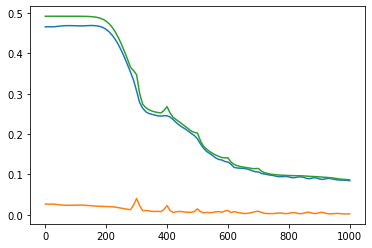

In [22]:
#Plot Energy
plotenergy(t,Pot_energy,Kin_energy,Tot_energy)

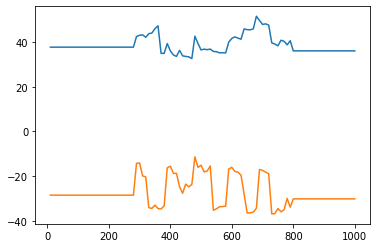

In [33]:
plotshifts(t,opt_shifts_t,"RQ_bestshift.tex")

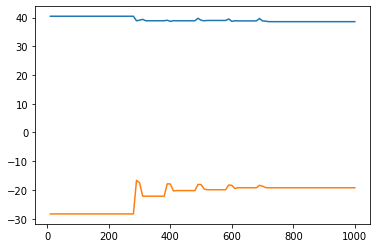

In [58]:
plotshifts(t,opt_shifts_t,"true_bestshift.tex")

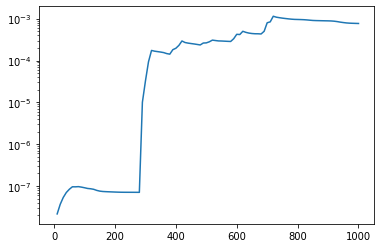

In [34]:
ploterror(t,Glo_error,filename = "rq_shift_global_error.tex")

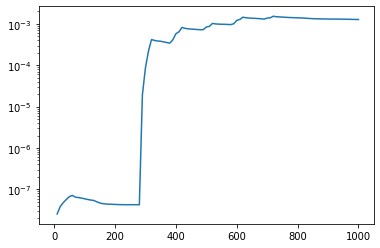

In [57]:
ploterror(t,Glo_error,filename = "best_shift_global_error.tex")

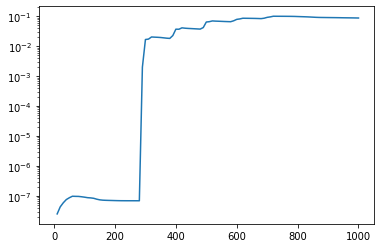

In [54]:
ploterror(t,Glo_error,filename = "first_shift_global_error.tex")

In [63]:
def prop(v,timegrid,m,shifts,dt,dx,mode):
    sols = torch.zeros((len(v),len(timegrid)),dtype = torch.complex128)
    sols[:,0] = v
    for i in range(len(timegrid)-1):
        M = magnus(timegrid[i],len(v),dt,dx)
        X = torch.linalg.inv(M - shifts[i]*torch.eye(len(v)))
        Vm,Hm,beta = Krylov.Arnoldi.Polynomial(X,sols[:,i],m,dx)
        if mode == "RQ":
            Am = Krylov.Solution.Rayleigh_Quotient(M,Vm,Hm,shifts[i],dx)
        elif mode == "SI":
            Am = shifts[i]*torch.eye(m) + torch.linalg.inv(Hm[0:-1,0:-1])
        else:
            print("mode must be either 'SI' or 'RQ'")
            break
        sols[:,i+1] = Krylov.Solution.Polynomial(Vm[:,0:-1],Am,1,beta,torch.matrix_exp)
        print('t ={0:4.0f}'.format(t[i+1]),end = '\r')
    return sols
# RQsols = prop(v,t,12,opt_shifts_t,dt,dx,"RQ")
# torch.save(RQsols,"Schrodinger_data/RQ_Sols.pt")

In [64]:
def compute_GE(numsols,refsols,dx):
    GE = torch.zeros((len(numsols[0,:])-1,),dtype = torch.float64)
    for i in range(len(numsols[0,:])-1):
        GE[i] = Krylov.L2.Error(numsols[:,i+1],refsols[:,i+1],dx)
    return GE

C:\Users\mt767\AppData\Local\Temp\ipykernel_11336\3606451224.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out = -1j*dt*(-Nabla + torch.diag(Krylov.Optimise.interpv(V0,N,[-240,240])) +e(t)*torch.diag(torch.tensor(torch.linspace(-240,240,N))))


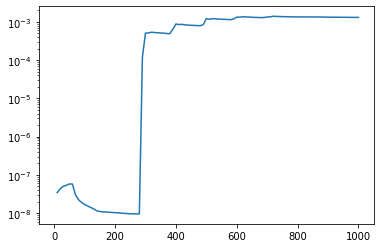

In [65]:
RQsols = prop(v,t,m,opt_shifts_t,dt,dx,"RQ")
torch.save(RQsols,"Schrodinger_data/RQ_Sols.pt")
RQGE = compute_GE(RQsols,glo_ref,dx)
torch.save(RQGE,"Schrodinger_data/RQ_Global_Error.pt")
ploterror(t,RQGE,filename="RQ_global_error.tex")

In [45]:
#Save optimiser outputs
torch.save(Pot_energy,"Schrodinger_data/Potential_Energy.pt")
torch.save(Kin_energy,"Schrodinger_data/Kinetic_Energy.pt")
torch.save(Tot_energy,"Schrodinger_data/Total_Energy.pt")
torch.save(opt_shifts_t,"Schrodinger_data/Optimiser_Shifts.pt")
torch.save(N_iter,"Schrodinger_data/No_Iterations.pt")
torch.save(Num_sols,"Schrodinger_data/Numerical_Solution.pt")
torch.save(Loc_error,"Schrodinger_data/Local_Error.pt")
torch.save(Glo_error,"Schrodinger_data/Global_Error.pt")
torch.save(objective,"Schrodinger_data/Defect_Error.pt")
torch.save(ftol,"Schrodinger_data/ftol.pt")


In [62]:
#Load optimiser outputs
ftol = torch.load("Schrodinger_data/ftol.pt")
Pot_energy = torch.load("Schrodinger_data/Potential_Energy.pt")
Kin_energy = torch.load("Schrodinger_data/Kinetic_Energy.pt")
Tot_energy = torch.load("Schrodinger_data/Total_Energy.pt")
opt_shifts_t = torch.load("Schrodinger_data/Optimiser_Shifts.pt")
N_iter = torch.load("Schrodinger_data/No_Iterations.pt")
Num_sols = torch.load("Schrodinger_data/Numerical_Solution.pt")
Loc_error = torch.load("Schrodinger_data/Local_Error.pt")
Glo_error = torch.load("Schrodinger_data/Global_Error.pt")
objective = torch.load("Schrodinger_data/Defect_Error.pt")
randgammas = torch.load("Schrodinger_data/randshifts.pt")
true_shifts = torch.load("Schrodinger_data/optpath.pt")
obj_loss = torch.load("Schrodinger_data/objloss.pt")
# true_loss = torch.load("Schrodinger_data/trueloss.pt")

C:\Users\Mark\AppData\Local\Temp\ipykernel_6320\747448302.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ftol = torch.load("Schrodinger_data/ftol.pt")
C:\Users\Mark\App

# Plot the results

In [7]:
#Plot functions
import tikzplotlib as tikz
#Plot pulse
def plotpulse(t,filename = "pulse.tex"):
    et = torch.zeros((len(t),))
    for i in range (len(t)):
        et[i] = e(t[i])
    plt.plot(t,et)
    tikz.save("Schrodinger_data/"+filename)

#Contour plot
def Contour(gammaR,gammaI,loss,shifts = None,randshifts = None,optshift = None,filename = "contour.tex"):
    hold = torch.nan_to_num(loss,nan=1e0)
    levels = torch.logspace(torch.log10(torch.min(hold)),torch.log10(torch.max(hold)),11)
    cont = plt.contour(gammaR,gammaI,loss,levels,norm=LogNorm())
    fmt = '%1.1e'  # Exponential format
    plt.clabel(cont, inline=True, fontsize=8, fmt=fmt, colors='black', manual=False, inline_spacing=3)
    if optshift != None:
        marker = ['o','s']
        for i in range(len(optshift)):
            plt.plot(optshift[i].real,optshift[i].imag,marker = marker[i],color = 'k')
    if randshifts != None:
        plt.plot(randshifts.real,randshifts.imag,'^',color = [0,0.2,0.8])
    if shifts != None:
        col = [[1,0.1,0.2],[0,0.6,0.1]]
        for i in range(len(shifts)):
            plt.plot(shifts[i].real,shifts[i].imag,'x',color = col[i])
            for j in range (len(shifts[i])-1):
                plt.arrow(shifts[i][j].real,shifts[i][j].imag,shifts[i][j+1].real - shifts[i][j].real,shifts[i][j+1].imag - shifts[i][j].imag,linestyle = (3,(3,6)),color = col[i],head_length = 0)
    tikz.save("Schrodinger_data/"+filename)

def plotwavefunction(x,psi,index,filename = "wavefunc.tex"):
    for i in range (len(index)):
        plt.plot(x,torch.abs(torch.pow(psi[:,index[i]],2)))
    tikz.save("Schrodinger_data/"+filename)

def plotpotential(x,V,times,filename = "potential.tex"):
    for i in range (len(times)):
        plt.plot(x,torch.real(torch.diag(V(times[i]))))
    # plt.ylim([-2.5,1.5])
    tikz.save("Schrodinger_data/"+filename)

def ploterror(t,error,tol=0,filename = "error.tex"):
    plt.plot(t[1:],error)
    plt.yscale('log')
    plt.hlines(tol,0,t[-1],'k','--')
    tikz.save("Schrodinger_data/"+filename)

def plotshifts(t,shifts,filename = "shifts.tex"):
    plt.plot(t[1:],shifts.real)
    plt.plot(t[1:],shifts.imag)
    tikz.save("Schrodinger_data/"+filename)

def plotenergy(t,Potential,Kinetic,Total,filename="energy.tex"):
    plt.plot(t,Potential)
    plt.plot(t,Kinetic)
    plt.plot(t,Total)
    tikz.save("Schrodinger_data/"+filename)

def plotiterations(t,iterations,filename="iterations.tex"):
    plt.plot(t[1:],iterations)
    tikz.save("Schrodinger_data/"+filename)

def plotoptimisation(error,filename="optimisation.tex"):
    plt.plot(torch.arange(len(error)),error)
    plt.yscale('log')
    tikz.save("Schrodinger_data/"+filename)

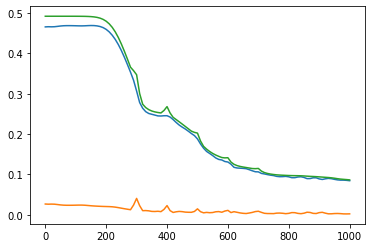

In [48]:
#Plot Energy
plotenergy(t,Pot_energy,Kin_energy,Tot_energy)

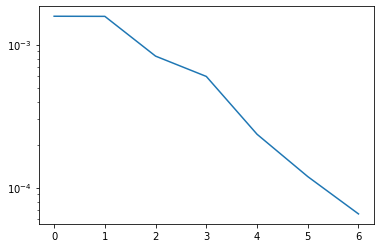

In [22]:
#Plot optimiser objective at t=0
plotoptimisation(obj_loss,filename = "defect_opt.tex")

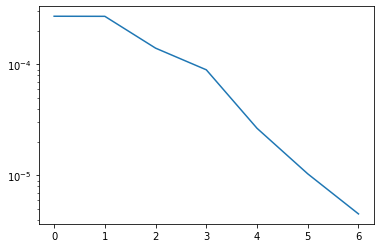

In [23]:
#Plot optimiser true error at t=0
plotoptimisation(true_loss,filename = "true_opt.tex")

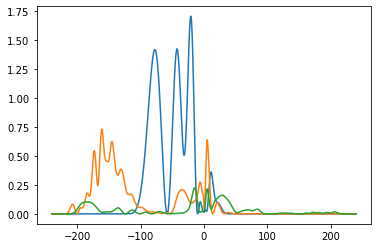

In [49]:
#Plot Wavefunction
plotwavefunction(x,13*Num_sols,[0,35,100])

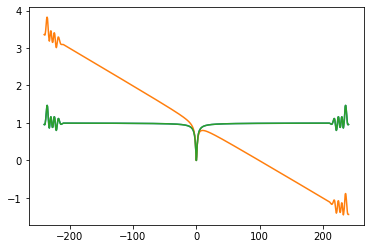

In [50]:
#Plot Potential
time = [t[0],t[40],t[100]]
plotpotential(x,V,time)

c:\Users\mt767\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_tensor.py:957: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)


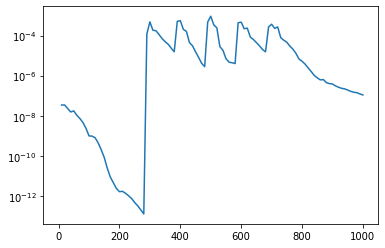

In [46]:
#Plot local error
ploterror(t,Loc_error,filename="local_error.tex")

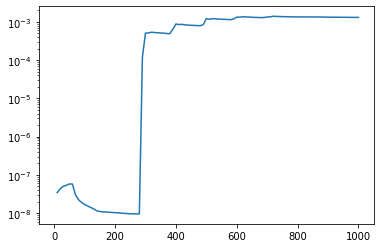

In [47]:
#Plot global error
ploterror(t,Glo_error,filename="global_error.tex")

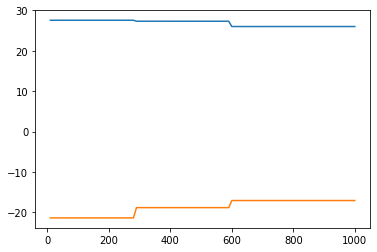

In [48]:
#Plot Shifts
plotshifts(t,opt_shifts_t)

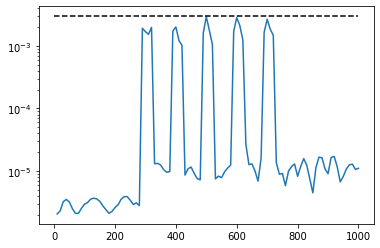

In [49]:
#Plot objective
ploterror(t,objective,tol=ftol,filename="defect_integral.tex")

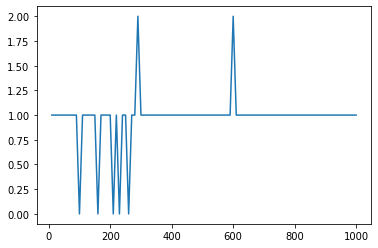

In [50]:
#Plot iterations
plotiterations(t,N_iter)

# Compute the Polynomial Krylov Global Error

C:\Users\mt767\AppData\Local\Temp\ipykernel_11336\3606451224.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out = -1j*dt*(-Nabla + torch.diag(Krylov.Optimise.interpv(V0,N,[-240,240])) +e(t)*torch.diag(torch.tensor(torch.linspace(-240,240,N))))


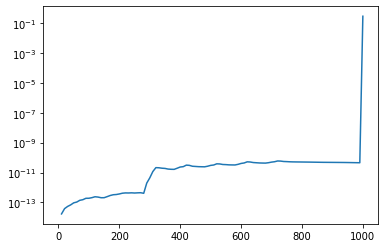

In [18]:
#Polynomial Krylov global error function
def Polynomial(v,m,t,dx):
    loss = torch.zeros((len(t)-1,))
    sols = torch.zeros((len(v),len(t)),dtype = torch.complex128)
    sols[:,0] = v
    # Est = v
    # h = 1#int(t[1]-t[0])
    for i in range (len(t)-1):
        M = magnus(t[i],len(v),t[1]-t[0],dx)
        Vm,Hm,beta = Krylov.Arnoldi.Polynomial(M,sols[:,i],m,dx)
        sols[:,i+1] = Krylov.Solution.Polynomial(Vm[:,0:-1],Hm[0:-1,0:-1],1,beta,torch.matrix_exp)
        # loss[i] = Krylov.L2.Error(Est,Ref[:,h*(i+1)],dx)
        print("t = ",int(t[i+1]),end = '\r')
    return sols

dtfact = 10
time = torch.linspace(t[0],t[-1],dtfact*n + 1)
# glo_ref = torch.load("Schrodinger_data/Ref_Sol.pt")
polysolsbig = Polynomial(v,m,time,dx)
polysols = torch.zeros(glo_ref.shape,dtype = torch.complex128)
for i in range(len(t)-1):
    polysols[:,i] = polysolsbig[:,i*dtfact]
polyerr = compute_GE(polysols,glo_ref,dx)
torch.save(polyerr,"Schrodinger_data/PolyKry_error"+str(dtfact)+".pt")
#Plot polynomial Krylov error
ploterror(t,polyerr,filename = "poly_GE_factor"+str(dtfact)+".tex")